In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
from citipy import citipy 
import requests
from config import weather_api_key

In [2]:
#create a set of random latitudes and longitudes
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add longs and lats to a list

coordinates = list(lat_lngs)


In [4]:
#create cities list
cities = []
#Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #add city if it is new to cities list
    if city not in cities:
        cities.append(city)

len(cities)


602

In [5]:
print(cities[1])

coihaique


In [10]:
#create an empty list to hold the wearther data
city_data = []
#create URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#Print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#loop through all cities in the list

for i, city in enumerate(cities):
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities.
    
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.]
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    
#End data retrieval
print("-------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaikalur
Processing Record 2 of Set 1 | coihaique
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | metehara
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | arklow
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | grand centre
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | china
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | hithad

Processing Record 34 of Set 4 | omboue
Processing Record 35 of Set 4 | byron bay
Processing Record 36 of Set 4 | okitipupa
Processing Record 37 of Set 4 | rongcheng
Processing Record 38 of Set 4 | richards bay
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | coello
Processing Record 41 of Set 4 | viligili
City not found. Skipping...
Processing Record 42 of Set 4 | tacuati
Processing Record 43 of Set 4 | ambulu
Processing Record 44 of Set 4 | puerto ayacucho
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | zhuhai
Processing Record 48 of Set 4 | zyryanka
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | kamenka
Processing Record 1 of Set 5 | careiro da varzea
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | viedma
Processing Record 5 of Set 5 | kibala
Processing Record 6 of Set 5 | nelson bay
Processing Record 7

Processing Record 23 of Set 8 | mount gambier
Processing Record 24 of Set 8 | alice
Processing Record 25 of Set 8 | wagga wagga
Processing Record 26 of Set 8 | erin
Processing Record 27 of Set 8 | carlisle
Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | zalantun
Processing Record 30 of Set 8 | djibo
Processing Record 31 of Set 8 | berlin
Processing Record 32 of Set 8 | rungata
City not found. Skipping...
Processing Record 33 of Set 8 | calabozo
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | chagda
City not found. Skipping...
Processing Record 36 of Set 8 | ormara
Processing Record 37 of Set 8 | satitoa
City not found. Skipping...
Processing Record 38 of Set 8 | la paz
Processing Record 39 of Set 8 | gariaband
Processing Record 40 of Set 8 | thilogne
City not found. Skipping...
Processing Record 41 of Set 8 | zeerust
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | tigil
Processing Record 44 of Set 8 | be

Processing Record 8 of Set 12 | padang
Processing Record 9 of Set 12 | carndonagh
Processing Record 10 of Set 12 | sinnamary
Processing Record 11 of Set 12 | inhambane
Processing Record 12 of Set 12 | san cristobal
Processing Record 13 of Set 12 | campbell river
Processing Record 14 of Set 12 | pantai remis
Processing Record 15 of Set 12 | meadow lake
Processing Record 16 of Set 12 | donskoy
Processing Record 17 of Set 12 | sao felix do xingu
Processing Record 18 of Set 12 | tsabong
Processing Record 19 of Set 12 | bairiki
Processing Record 20 of Set 12 | lo arado
Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | penzance
Processing Record 23 of Set 12 | invermere
Processing Record 24 of Set 12 | palasa
Processing Record 25 of Set 12 | panagar
Processing Record 26 of Set 12 | arawa
Processing Record 27 of Set 12 | ugoofaaru
Processing Record 28 of Set 12 | lensk
Processing Record 29 of Set 12 | beaufort
Processing Record 30 of Set 12 | k

In [11]:
len(city_data)

550

In [12]:
#convert the array of dictionaries to a pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaikalur,16.5667,81.2000,71.82,68,35,1.61,IN,2022-02-02 02:54:06
1,Coihaique,-45.5752,-72.0662,58.95,51,0,9.22,CL,2022-02-02 02:54:07
2,Cidreira,-30.1811,-50.2056,72.77,75,0,13.82,BR,2022-02-02 02:54:07
3,Port Alfred,-33.5906,26.8910,77.49,74,100,7.18,ZA,2022-02-02 02:54:08
4,Arklow,52.7931,-6.1414,48.49,74,100,17.18,IE,2022-02-02 02:50:13


In [14]:
#reorder city data df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaikalur,IN,2022-02-02 02:54:06,16.5667,81.2000,71.82,68,35,1.61
1,Coihaique,CL,2022-02-02 02:54:07,-45.5752,-72.0662,58.95,51,0,9.22
2,Cidreira,BR,2022-02-02 02:54:07,-30.1811,-50.2056,72.77,75,0,13.82
3,Port Alfred,ZA,2022-02-02 02:54:08,-33.5906,26.8910,77.49,74,100,7.18
4,Arklow,IE,2022-02-02 02:50:13,52.7931,-6.1414,48.49,74,100,17.18
...,...,...,...,...,...,...,...,...,...
545,Alofi,NU,2022-02-02 03:08:53,-19.0595,-169.9187,78.69,89,75,4.61
546,Soyo,AO,2022-02-02 03:08:53,-6.1349,12.3689,77.25,86,85,5.50
547,Chengde,CN,2022-02-02 03:08:54,40.9725,117.9361,22.28,32,0,8.84
548,Kurilsk,RU,2022-02-02 03:09:54,45.2333,147.8833,24.71,85,98,19.57


In [15]:
#create CSV file
output_data_file = "weather_data/cities.csv"
# export city_data into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


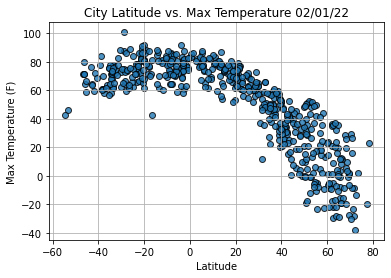

In [26]:
#create lat vs Max temp scatter plot
#import time module
import time

#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
#add other properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
plt.savefig("weather_data/Fig1.png")

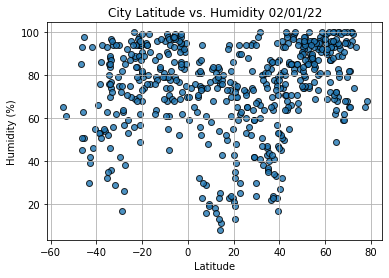

In [27]:
#import time module
import time

#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
#add other properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
plt.savefig("weather_data/Fig2.png")

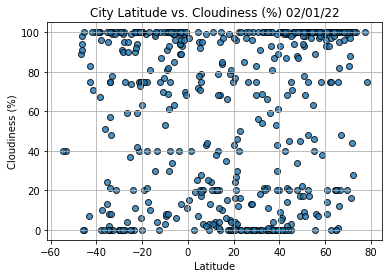

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


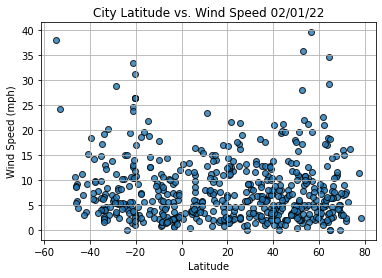

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,wind_speed, edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()